## Importing libraries

In [149]:
import seaborn as sns 
import os 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from geneticalgorithm import geneticalgorithm as ge 
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split 


In [150]:
os.listdir()

['.ipynb_checkpoints',
 '316_Optimizing_Steel_Strength_using_Metaheuristic_algo.ipynb',
 'flagged',
 'steel_strength.csv',
 'Untitled.ipynb']

## Getting dataset 
* here you can find the dataset on kaggle         https://www.kaggle.com/datasets/fuarresvij/steel-test-data

In [151]:
df=pd.read_csv('steel_strength.csv')

## Exploring Data

In [152]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [153]:
df_shape=df.shape
print(f'the data has {df_shape[0]} rows and {df_shape[1]} columns')

the data has 312 rows and 17 columns


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   formula           312 non-null    object 
 1   c                 312 non-null    float64
 2   mn                312 non-null    float64
 3   si                312 non-null    float64
 4   cr                312 non-null    float64
 5   ni                312 non-null    float64
 6   mo                312 non-null    float64
 7   v                 312 non-null    float64
 8   n                 312 non-null    float64
 9   nb                312 non-null    float64
 10  co                312 non-null    float64
 11  w                 312 non-null    float64
 12  al                312 non-null    float64
 13  ti                312 non-null    float64
 14  yield strength    312 non-null    float64
 15  tensile strength  312 non-null    float64
 16  elongation        303 non-null    float64
dt

In [155]:
df.isnull().sum()

formula             0
c                   0
mn                  0
si                  0
cr                  0
ni                  0
mo                  0
v                   0
n                   0
nb                  0
co                  0
w                   0
al                  0
ti                  0
yield strength      0
tensile strength    0
elongation          9
dtype: int64

## describition of columns values 

In [156]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
c,312.0,0.096442,0.109008,0.00,0.010,0.030,0.1825,0.43
mn,312.0,0.146250,0.397102,0.01,0.010,0.010,0.0800,3.00
si,312.0,0.221218,0.580796,0.01,0.010,0.010,0.1100,4.75
cr,312.0,8.043830,5.426169,0.01,3.100,9.050,12.5200,17.50
ni,312.0,8.184006,6.337055,0.01,0.960,8.500,12.1175,21.00
mo,312.0,2.766090,1.832908,0.02,1.500,2.210,4.0900,9.67
v,312.0,0.183750,0.452462,0.00,0.010,0.010,0.1275,4.32
n,312.0,0.005545,0.018331,0.00,0.000,0.000,0.0000,0.15
nb,312.0,0.035449,0.161537,0.00,0.010,0.010,0.0100,2.50
co,312.0,7.008782,6.254431,0.01,0.010,7.085,13.4800,20.10


## plotting histogram of every element percentage

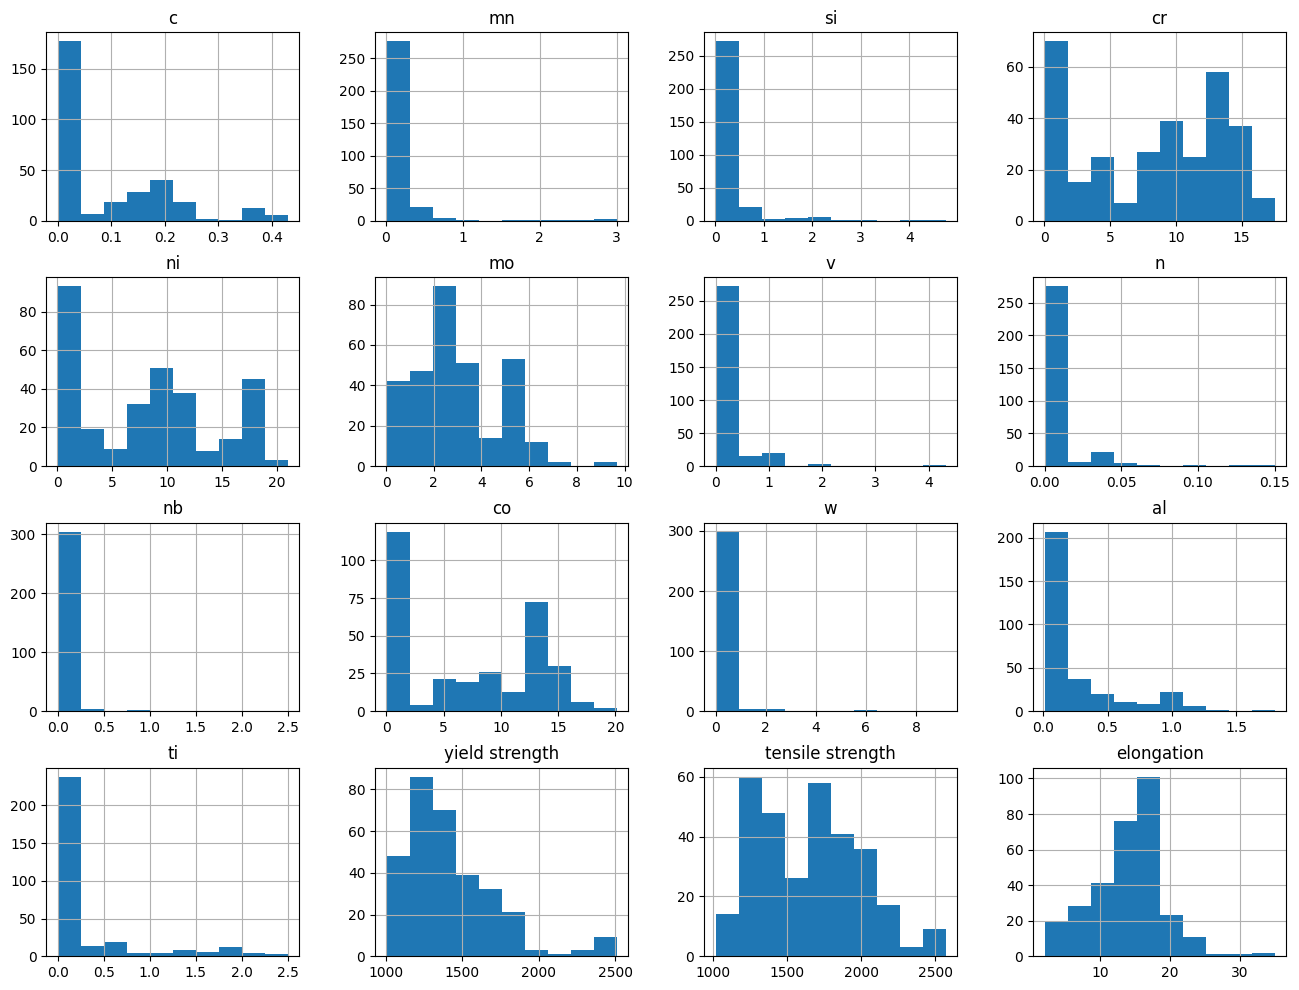

In [157]:
df.hist(figsize=(16,12))
plt.show()

##  how different elements affect Yield strength value 
#### The resulting correlation coefficient varies from -1 to +1, with -1 being a perfect negative correlation, 
#### +1 representing a perfect positive correlation and 0 representing no correlation between the variables.
* for example titanuim(ti) is  Directly proportional with yield strength as it's correlation value with it is 0.51
* Chromium (cr) is  inversly proportional with yield strength as it's correlation value with it is -0.4087  

In [158]:
df.drop(columns='formula').corrwith(df['yield strength'])

c                   0.146949
mn                 -0.172716
si                 -0.131461
cr                 -0.408730
ni                  0.252954
mo                  0.064278
v                   0.200595
n                  -0.117023
nb                  0.032042
co                  0.200274
w                  -0.025941
al                 -0.035487
ti                  0.510252
yield strength      1.000000
tensile strength    0.821071
elongation         -0.575289
dtype: float64

In [159]:
df_1=pd.DataFrame(df.drop(columns=['formula','yield strength','tensile strength','elongation']).corrwith(df['yield strength']))

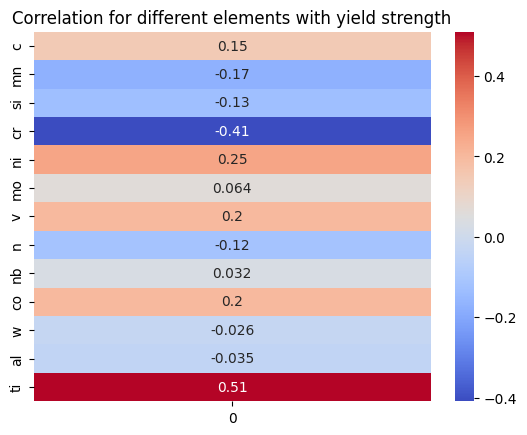

In [160]:

sns.heatmap(df_1,annot=True,cmap='coolwarm')
plt.title('Correlation for different elements with yield strength')
plt.show()

## Applying Regression using random forrest

In [161]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [162]:
X=df.iloc[:,1:-3].values
y=df.iloc[:,-3].values

In [163]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [164]:

forrest_regressor=RandomForestRegressor()
forrest_regressor.fit(X_train,y_train)

RandomForestRegressor()

In [165]:
y_pred=forrest_regressor.predict(X_test)

In [166]:
r2_score=r2_score(y_test,y_pred)
print(f"the r squared equal {r2_score}")

the r squared equal 0.9046764137021772


In [167]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


## predicting what would be the yield strength for specific alloying elemnts percentage  with a gradio user interface 

#### just add each element percentage and you will get the yield strength of the alloy 

In [168]:
import gradio 

def predict_yield_strength(carbon,manganese,silicon,chromium,nickel,molybdenum,vanadium,nitrogen,niobium,cobalt,tungsten,aluminium,titanium):
    prediction_result = forrest_regressor.predict([[carbon,manganese,silicon,chromium,nickel,molybdenum,vanadium,nitrogen,niobium,cobalt,tungsten,aluminium,titanium]])
    return 'Predicted Yield Strength equals  ', round(prediction_result[0],3)  # Adding label to the output

app = gradio.Interface(fn=predict_yield_strength, inputs=['text','text','text','text','text','text','text','text','text','text','text','text','text'], outputs='text')
app.launch(share=True)


Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://5d29deb7baa1c2136e.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


##  To know what are elemnts that most affect yield strength 

In [169]:
features=df.columns[1:-3]
importance=forrest_regressor.feature_importances_

feature_importance=pd.Series(importance,index=features)
feature_importance=feature_importance.sort_values(ascending=True)

In [170]:
feature_importance

n     0.001424
w     0.002275
nb    0.008097
v     0.015986
ni    0.031613
cr    0.038004
co    0.057845
mo    0.058759
al    0.071031
mn    0.079690
si    0.095393
c     0.136803
ti    0.403083
dtype: float64

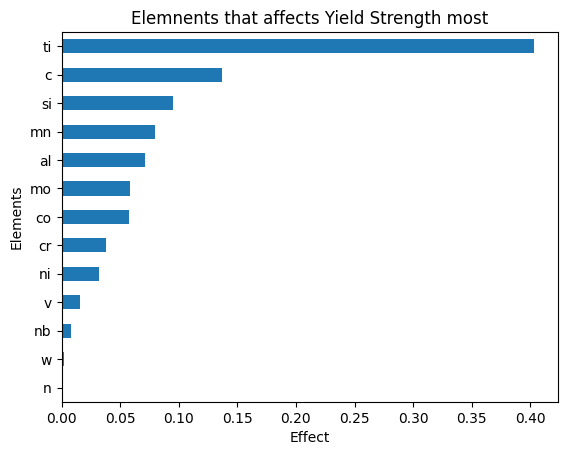

In [171]:
feature_importance.plot(kind='barh')
plt.xlabel('Effect')
plt.ylabel('Elements')
plt.title('Elemnents that affects Yield Strength most')
plt.show()

## optmization using genetic algorithm to find highest yield strength that can be achieved and what percentage of each alloying element that can achieve that


In [172]:
forrest_full=RandomForestRegressor()
forrest_full.fit(X,y)

RandomForestRegressor()

In [173]:
def obj_func(x):
    x=[x]
    result=forrest_full.predict(x)

    return -result

In [174]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [175]:
boundaries = np.array([[df['c'].min(), df['c'].max()],
[df['mn'].min(), df['mn'].max()],
[df['si'].min(), df['si'].max()],
[df['cr'].min(), df['cr'].max()],
[df['ni'].min(), df['ni'].max()],
[df['mo'].min(), df['mo'].max()],
[df['v'].min(), df['v'].max()],
[df['n'].min(), df['n'].max()],
[df['nb'].min(), df['nb'].max()],
[df['co'].min(), df['co'].max()],
[df['w'].min(), df['w'].max()],
[df['al'].min(), df['al'].max()],
[df['ti'].min(), df['ti'].max()]])

In [176]:
algorithm_param = {'max_num_iteration': 10,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [177]:

genetic_model=ge(function=obj_func,dimension=13,variable_type='real',variable_boundaries=boundaries,algorithm_parameters=algorithm_param)

 The best solution found:                                                                           
 [ 0.23754616  0.13098328  3.76898217  5.04565476 20.58851635  4.25690741
  1.01605578  0.07360961  0.65743076 11.76127612  1.72301766  0.51150633
  1.45969121]

 Objective function:
 -2466.719999999997


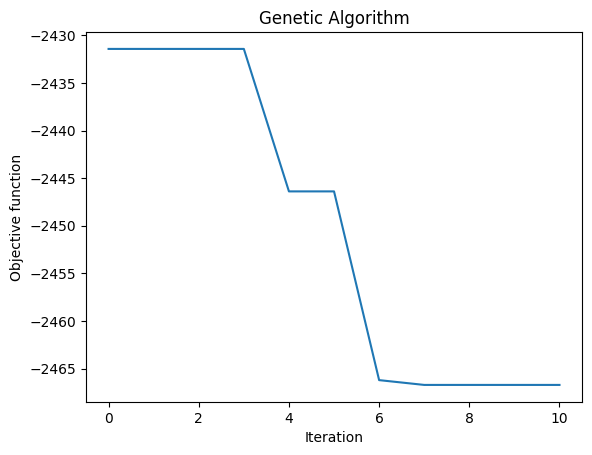

In [178]:
genetic_model.run()

In [179]:
result=genetic_model.output_dict
result

{'variable': array([ 0.23754616,  0.13098328,  3.76898217,  5.04565476, 20.58851635,
         4.25690741,  1.01605578,  0.07360961,  0.65743076, 11.76127612,
         1.72301766,  0.51150633,  1.45969121]),
 'function': -2466.719999999997}

In [180]:
max_yield_strength=round(-result['function'],2)

In [181]:
print("Maximum yield strenght that can be achieved =",max_yield_strength)

Maximum yield strenght that can be achieved = 2466.72


In [182]:
## M

In [183]:
df.head()

,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,yield strength,tensile strength,elongation
0,Fe0.620C0.000953Mn0.000521Si0.00102Cr0.000110N...,0.02,0.05,0.05,0.01,19.70,2.95,0.01,0.00,0.01,15.00,0.00,0.15,1.55,2411.5,2473.5,7.0
1,Fe0.623C0.00854Mn0.000104Si0.000203Cr0.147Ni0....,0.18,0.01,0.01,13.44,0.01,3.01,0.46,0.04,0.01,19.46,2.35,0.04,0.00,1123.1,1929.2,8.0
2,Fe0.625Mn0.000102Si0.000200Cr0.0936Ni0.129Mo0....,0.00,0.01,0.01,8.67,13.45,0.82,0.01,0.00,0.01,13.90,0.00,0.39,0.57,1736.3,1871.8,NaN
3,Fe0.634C0.000478Mn0.000523Si0.00102Cr0.000111N...,0.01,0.05,0.05,0.01,17.70,3.95,0.01,0.00,0.01,15.00,0.00,0.13,1.47,2487.3,2514.9,9.0
4,Fe0.636C0.000474Mn0.000518Si0.00101Cr0.000109N...,0.01,0.05,0.05,0.01,19.40,1.45,0.01,0.00,0.01,14.90,0.00,0.13,1.55,2249.6,2315.0,8.5


In [184]:
train_cols=df.columns[1:-3]

##  each element percentage that we should add to get highest yield strength =2451.66

In [185]:
result_dict={}
for i in range(len(train_cols)):
    result_dict[train_cols[i]]=result['variable'][i]
result_dict    

{'c': 0.23754615639199567,
 'mn': 0.13098328220610864,
 'si': 3.7689821733199977,
 'cr': 5.045654760109943,
 'ni': 20.588516354038024,
 'mo': 4.256907411474085,
 'v': 1.0160557774580976,
 'n': 0.07360960858981647,
 'nb': 0.6574307644915818,
 'co': 11.761276119527713,
 'w': 1.7230176608216776,
 'al': 0.5115063310260493,
 'ti': 1.4596912073394839}